In [1]:
!pip install selenium


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import selenium 
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from time import sleep
import getpass

In [3]:
my_user = "@krishn_amr14597"
my_pass = getpass.getpass()

········


In [4]:
# PATH = r"E:\Untitled Folder\programfiles.exe"
# driver = webdriver.Chrome(PATH)
# driver.get("https://x.com/i/flow/login")
# sleep(3)
# from selenium import webdriver

# Simply create the Chrome driver without specifying the path
driver = webdriver.Chrome()

driver.implicitly_wait(10)

# Now you can use the driver for your web automation tasks
driver.get("https://x.com/i/flow/login")


In [5]:
user_id = driver.find_element(By.XPATH,"//input[@type='text']")
user_id.send_keys(my_user)
user_id.send_keys(Keys.ENTER)
# driver.implicitly_wait(10)

In [6]:
# my_mob = "8875316737"
# mob_no = driver.find_element(By.XPATH,"//input[@type='text']")
# mob_no.send_keys(my_mob)
# mob_no.send_keys(Keys.ENTER)
# # driver.implicitly_wait(10)

In [7]:
password = driver.find_element(By.XPATH,"//input[@type='password']")
password.send_keys(my_pass)
password.send_keys(Keys.ENTER)

In [8]:
search_item = "Narendra Modi"
search_box = driver.find_element(By.XPATH,"//input[@data-testid='SearchBox_Search_Input']")
search_box.send_keys(search_item)
search_box.send_keys(Keys.ENTER)

In [9]:
all_tweets = set()

tweets = driver.find_elements(By.XPATH,"//div[@data-testid='tweetText']")
while True:
    for tweet in tweets:
        all_tweets.add(tweet.text)
    driver.execute_script('window.scrollTo(0,document.body.scrollHeight);')
    sleep(3)
    tweets = driver.find_elements(By.XPATH,"//div[@data-testid='tweetText']")
    if len(all_tweets)>50:
        break

In [10]:
all_tweets = list(all_tweets)
all_tweets[0]


'Prime Minister Narendra Modi leads a Yoga session at Sher-i-Kashmir International Conference Centre (SKICC) in Srinagar on J&K, on International Day of Yoga.'

Cleaning the tweets


In [11]:
import pandas as pd
pd.options.display.max_colwidth = 1000
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to C:\Users\Amrit
[nltk_data]     Krishn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Amrit
[nltk_data]     Krishn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
stp_words = stopwords.words('english')
stp_words
# stop_words_hi = stopwords.words('hindi')
# stop_words_hi

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [14]:
df = pd.DataFrame(all_tweets,columns=['tweets'])
df.head()

,tweets
0,"Prime Minister Narendra Modi leads a Yoga session at Sher-i-Kashmir International Conference Centre (SKICC) in Srinagar on J&K, on International Day of Yoga."
1,"योग दिवस : कश्मीर में कश्मीरियों के साथ PM \n@narendramodi\n . नागपुर में 2nd Year अभ्यास वर्ग के समापन पर \n@RSSorg\n चीफ डॉ.मोहन भागवत के उदबोधन संकेतों का है यह इम्पैक्ट ??\n# विनम्र निवेदन, यह पोस्ट विचारों, परिस्थितियों का विश्लेषण कर सकने की सलाहियत रखने वालों के लिये है."
2,"Fostering India-Italy friendship!\n\nPM \n@narendramodi\n and PM \n@GiorgiaMeloni\n held a bilateral meeting on the sidelines of the G7 Summit. They conversed about taking forward the outcomes of the G20 Summit into the G7, augmenting partnership opportunities in defence development and"
3,"Today being International yoga day ,I was elated to practice yoga at Tiruvannamalai with district presidents , students , people from all walks of life ,who volunteered with utmost enthusiasm to part take in this global initiative thanks to \n@narendramodi\n ji . Hoping to practice"
4,"Post Yoga selfies in Srinagar! Unparalled vibrancy here, at the Dal Lake."


In [ ]:
from deep_translator import GoogleTranslator
import pandas as pd

# Assuming you have a DataFrame 'df' with a column 'tweets'
# Create a new column 'english_tweets' to store the translations
df['english_tweets'] = df['tweets'].apply(lambda sentence: GoogleTranslator(source='auto', target='en').translate(sentence))

# Now 'df' contains both the original tweets and their English translations
# print(df[['tweets', 'english_tweets']])


In [15]:
one_tweet =  df['tweets']
one_tweet

0                                                                                                                                          Prime Minister Narendra Modi leads a Yoga session at Sher-i-Kashmir International Conference Centre (SKICC) in Srinagar on J&K, on International Day of Yoga.
1          योग दिवस : कश्मीर में कश्मीरियों के साथ PM \n@narendramodi\n .    नागपुर में 2nd Year अभ्यास वर्ग के समापन पर  \n@RSSorg\n  चीफ डॉ.मोहन भागवत के उदबोधन  संकेतों का है यह इम्पैक्ट ??\n#  विनम्र निवेदन, यह पोस्ट विचारों, परिस्थितियों का विश्लेषण कर सकने की सलाहियत रखने वालों के लिये है.
2        Fostering India-Italy friendship!\n\nPM \n@narendramodi\n and PM \n@GiorgiaMeloni\n held a bilateral meeting on the sidelines of the G7 Summit. They conversed about taking forward the outcomes of the G20 Summit into the G7, augmenting partnership opportunities in defence development and
3             Today being International yoga day ,I was elated to practice yoga at Tiruvannamalai with distri

In [16]:
!pip install textblob
from textblob import TextBlob
from wordcloud import WordCloud

def TweetCleaning(tweet):
    clean_tweet = re.sub('[^a-zA-Z0-9]',' ',tweet)
    clean_tweet = ' '.join(word for word in clean_tweet.split() if word not in stp_words)
    return clean_tweet

def calPolarity(tweet):
    return TextBlob(tweet).sentiment.polarity

def calSubjectivity(tweet):
    return TextBlob(tweet).sentiment.subjectivity

def segmentation(tweet):
    if tweet >0:
        return "positive"
    if tweet==0:
        return "neutral"
    else:
        return "negative"


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
# clean_tweet

In [18]:
# clean_tweet.split()

In [19]:
# type(clean_tweet)

In [20]:
df['Cleaned_tweets'] = df['tweets'].apply(TweetCleaning)
df.head(20)

,tweets,Cleaned_tweets
0,"Prime Minister Narendra Modi leads a Yoga session at Sher-i-Kashmir International Conference Centre (SKICC) in Srinagar on J&K, on International Day of Yoga.",Prime Minister Narendra Modi leads Yoga session Sher Kashmir International Conference Centre SKICC Srinagar J K International Day Yoga
1,"योग दिवस : कश्मीर में कश्मीरियों के साथ PM \n@narendramodi\n . नागपुर में 2nd Year अभ्यास वर्ग के समापन पर \n@RSSorg\n चीफ डॉ.मोहन भागवत के उदबोधन संकेतों का है यह इम्पैक्ट ??\n# विनम्र निवेदन, यह पोस्ट विचारों, परिस्थितियों का विश्लेषण कर सकने की सलाहियत रखने वालों के लिये है.",PM narendramodi 2nd Year RSSorg
2,"Fostering India-Italy friendship!\n\nPM \n@narendramodi\n and PM \n@GiorgiaMeloni\n held a bilateral meeting on the sidelines of the G7 Summit. They conversed about taking forward the outcomes of the G20 Summit into the G7, augmenting partnership opportunities in defence development and",Fostering India Italy friendship PM narendramodi PM GiorgiaMeloni held bilateral meeting sidelines G7 Summit They conversed taking forward outcomes G20 Summit G7 augmenting partnership opportunities defence development
3,"Today being International yoga day ,I was elated to practice yoga at Tiruvannamalai with district presidents , students , people from all walks of life ,who volunteered with utmost enthusiasm to part take in this global initiative thanks to \n@narendramodi\n ji . Hoping to practice",Today International yoga day I elated practice yoga Tiruvannamalai district presidents students people walks life volunteered utmost enthusiasm part take global initiative thanks narendramodi ji Hoping practice
4,"Post Yoga selfies in Srinagar! Unparalled vibrancy here, at the Dal Lake.",Post Yoga selfies Srinagar Unparalled vibrancy Dal Lake
5,This is inhuman \n\nAn Old woman was beaten and attacked by TMC goons just because she was carrying a BJP flag in West Bengal. \n\nHer crime was that she campaigned for BJP and voted for Narendra Modi in Loksabha Elections.,This inhuman An Old woman beaten attacked TMC goons carrying BJP flag West Bengal Her crime campaigned BJP voted Narendra Modi Loksabha Elections
6,Glimpses of Hon’ble PM Shri \n@narendramodi\n ji clicking selfies with the people of Kashmir after a vibrant Yoga session.\n\n#InternationalYogaDay2024 #IDY2024,Glimpses Hon ble PM Shri narendramodi ji clicking selfies people Kashmir vibrant Yoga session InternationalYogaDay2024 IDY2024
7,Kangana Ranaut has problems with every actor except Narendra Modi\n\n-Naseeruddin Shah,Kangana Ranaut problems every actor except Narendra Modi Naseeruddin Shah
8,"""जो इमेज थी डर वाली उसे इलेक्शन के नतीजों ने फाड़ कर रख दिया है""\n\n◆ NEET पेपर और UGC-NET के पेपर लीक पर राहुल गाँधी ने PM मोदी पर तंज कसते हुए प्रेस वार्ता में कहा\n@narendramodi\n | \n@RahulGandhi\n | #UGCNET | #NEET | #PMModi | Narendra Modi",NEET UGC NET PM narendramodi RahulGandhi UGCNET NEET PMModi Narendra Modi
9,"हा मैंने और मेरे भाई ने ही कन्हैया कुमार को पीटा हैं और उसकी वजह भी बताई दोनों भाईओ ने …..\n\nभारत तेरे टुकड़े होंगे ……..\nअफ़ज़ल हम शर्मिंदा है तेरे कातिल ज़िंदा है ……..\n\nकन्नैहा कुमार के इन नारों से नाराज़ थे दोनों भाई ,",


In [21]:
df.shape

(54, 2)

In [22]:
df['tPolarity'] = df['Cleaned_tweets'].apply(calPolarity)
df['tSubjectivity'] = df['Cleaned_tweets'].apply(calSubjectivity)
df['segmentation'] = df['tPolarity'].apply(segmentation)
df.head()

,tweets,Cleaned_tweets,tPolarity,tSubjectivity,segmentation
0,"Prime Minister Narendra Modi leads a Yoga session at Sher-i-Kashmir International Conference Centre (SKICC) in Srinagar on J&K, on International Day of Yoga.",Prime Minister Narendra Modi leads Yoga session Sher Kashmir International Conference Centre SKICC Srinagar J K International Day Yoga,0.000000,0.000000,neutral
1,"योग दिवस : कश्मीर में कश्मीरियों के साथ PM \n@narendramodi\n . नागपुर में 2nd Year अभ्यास वर्ग के समापन पर \n@RSSorg\n चीफ डॉ.मोहन भागवत के उदबोधन संकेतों का है यह इम्पैक्ट ??\n# विनम्र निवेदन, यह पोस्ट विचारों, परिस्थितियों का विश्लेषण कर सकने की सलाहियत रखने वालों के लिये है.",PM narendramodi 2nd Year RSSorg,0.000000,0.000000,neutral
2,"Fostering India-Italy friendship!\n\nPM \n@narendramodi\n and PM \n@GiorgiaMeloni\n held a bilateral meeting on the sidelines of the G7 Summit. They conversed about taking forward the outcomes of the G20 Summit into the G7, augmenting partnership opportunities in defence development and",Fostering India Italy friendship PM narendramodi PM GiorgiaMeloni held bilateral meeting sidelines G7 Summit They conversed taking forward outcomes G20 Summit G7 augmenting partnership opportunities defence development,0.000000,0.000000,neutral
3,"Today being International yoga day ,I was elated to practice yoga at Tiruvannamalai with district presidents , students , people from all walks of life ,who volunteered with utmost enthusiasm to part take in this global initiative thanks to \n@narendramodi\n ji . Hoping to practice",Today International yoga day I elated practice yoga Tiruvannamalai district presidents students people walks life volunteered utmost enthusiasm part take global initiative thanks narendramodi ji Hoping practice,0.066667,0.066667,positive
4,"Post Yoga selfies in Srinagar! Unparalled vibrancy here, at the Dal Lake.",Post Yoga selfies Srinagar Unparalled vibrancy Dal Lake,0.000000,0.000000,neutral


Analysis


In [23]:
df.pivot_table(index=['segmentation'],aggfunc={'segmentation':'count'})

,segmentation
segmentation,
negative,1
neutral,39
positive,14


In [24]:
df.sort_values(by=['tPolarity'],ascending=False).head(3)

,tweets,Cleaned_tweets,tPolarity,tSubjectivity,segmentation
47,Can Narendra Modi sit in such a conference? \n\nIndia had golden period from 2004 to 2014. \nIt was a matter of proud to have such an intelligent person as India's Prime Minister.,Can Narendra Modi sit conference India golden period 2004 2014 It matter proud intelligent person India Prime Minister,0.633333,0.8,positive
53,"My state Manipur is burning, kindly help \n@narendramodi\n @PMOIndia\n @AmitShah\n @rajnathsingh\n @republic\n @ndtv\n @IndiaToday",My state Manipur burning kindly help narendramodi PMOIndia AmitShah rajnathsingh republic ndtv IndiaToday,0.600000,0.9,positive
10,"What a stunning shot of HH Sheikh Mohamed bin Zayed and PM Shri Narendra Modi ji at see off …\n\nThe respect, love, and hospitality that PM Modi Ji and India gave us will NEVER be forgotten by Emiratis.\n\nDhannaywad and Mashkureen ! \n\n by HamadAlKaabi / IG",What stunning shot HH Sheikh Mohamed bin Zayed PM Shri Narendra Modi ji see The respect love hospitality PM Modi Ji India gave us NEVER forgotten Emiratis Dhannaywad Mashkureen HamadAlKaabi IG,0.500000,0.8,positive


In [25]:
###neutral
df[df.tPolarity==0].shape

(39, 5)

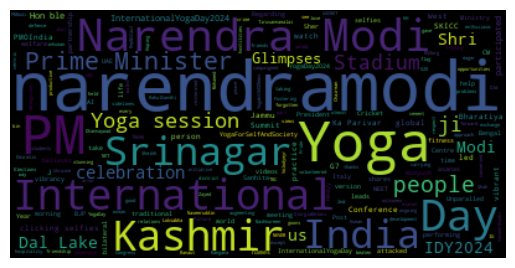

In [26]:
import matplotlib.pyplot as plt
consolidated = ' '.join(word for word in df['Cleaned_tweets'])

wordcloud = WordCloud(width=400, height=200, random_state=20,max_font_size=120).generate(consolidated)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [27]:
import seaborn as sns

<Axes: xlabel='tPolarity', ylabel='tSubjectivity'>

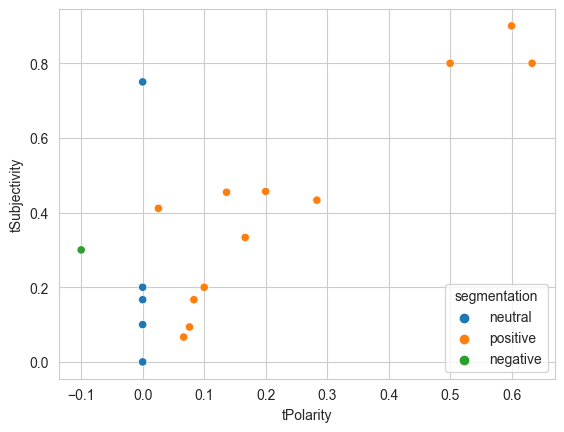

In [28]:
sns.set_style("whitegrid")
sns.scatterplot(data=df,x='tPolarity',y='tSubjectivity',hue='segmentation')


<Axes: xlabel='segmentation', ylabel='count'>

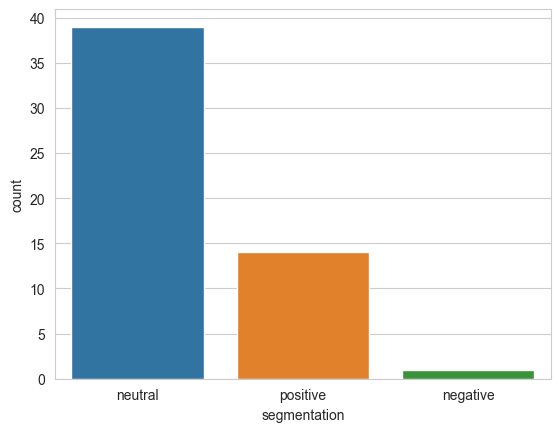

In [29]:
sns.countplot(data=df,x='segmentation')

In [30]:

positive = round(len(df[df.segmentation == 'positive'])/len(df)*100,1)
negative = round(len(df[df.segmentation == 'negative'])/len(df)*100,1)
neutral = round(len(df[df.segmentation == 'neutral'])/len(df)*100,1)

responses = [positive, negative, neutral]
responses

response = {'resp': ['mayWin', 'mayLoose', 'notSure'], 'pct':[positive, negative, neutral]}
pd.DataFrame(response)

,resp,pct
0,mayWin,25.9
1,mayLoose,1.9
2,notSure,72.2


In [31]:
responses = [positive, negative, neutral]
responses

response = {'resp': ['mayWin', 'mayLoose', 'notSure'], 'pct':[positive, negative, neutral]}
pd.DataFrame(response)

,resp,pct
0,mayWin,25.9
1,mayLoose,1.9
2,notSure,72.2


In [32]:
!pip install spacy
import spacy

# Load the Hindi language model
nlp = spacy.load("hi_core_news_sm")

# Example sentence
hindi_text = "उत्तर के राजा होने के अलावा, जॉन स्नो एक अंग्रेजी चिकित्सक और संज्ञाहरण और चिकित्सा स्वच्छता के विकास में अग्रणी है।"

# Tokenize and remove stopwords
tokens = [token.text for token in nlp(hindi_text) if not token.is_stop]

# Join the cleaned tokens back into a sentence
cleaned_text = " ".join(tokens)
print(cleaned_text)



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


OSError: [E050] Can't find model 'hi_core_news_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

In [33]:
stop_words = StopWordsCleaner.pretrained("stopwords_hi", "hi") \
        .setInputCols(["token"]) \
        .setOutputCol("cleanTokens")
nlp_pipeline = Pipeline(stages=[document_assembler, tokenizer, stop_words])
light_pipeline = LightPipeline(nlp_pipeline.fit(spark.createDataFrame([['']]).toDF("text")))
results = light_pipeline.fullAnnotate("उत्तर के राजा होने के अलावा, जॉन स्नो एक अंग्रेजी चिकित्सक और संज्ञाहरण और चिकित्सा स्वच्छता के विकास में अग्रणी है।")

NameError: name 'StopWordsCleaner' is not defined

In [35]:
import codecs
 
# This is to translate the text from Hindi to English
!pip install deep_translator

from deep_translator import GoogleTranslator


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


                                              0.0/42.3 kB ? eta -:--:--
     ------------------                     20.5/42.3 kB 330.3 kB/s eta 0:00:01
     ---------------------------            30.7/42.3 kB 445.2 kB/s eta 0:00:01
     -------------------------------------- 42.3/42.3 kB 294.0 kB/s eta 0:00:00


In [36]:
!pip install googletrans



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
                                              0.0/55.1 kB ? eta -:--:--
                                              0.0/55.1 kB ? eta -:--:--
     ----------------------                   30.7/55.1 kB 1.3 MB/s eta 0:00:01
     ----------------------------           41.0/55.1 kB 653.6 kB/s eta 0:00:01
     -------------------------------------- 55.1/55.1 kB 477.2 kB/s eta 0:00:00
                                              0.0/1.2 MB ? eta -:--:--
     -                                        0.0/1.2 MB ? eta -:--:--
     --                                       0.1/1.2 MB 1.1 MB/s eta 0:00:01
     ----                                     0.1/1.2 MB 1.4 MB/s eta 0:00:01
     -----                                    0.2/1.2 MB 1.2 MB/s eta 0:00:01
     -------                                  0.2/1.2 MB 1.3 MB/s eta 0:00:01
     ----------                               0.3/1.2 MB 1.

In [37]:
df

,tweets,Cleaned_tweets,tPolarity,tSubjectivity,segmentation
0,"Prime Minister Narendra Modi leads a Yoga session at Sher-i-Kashmir International Conference Centre (SKICC) in Srinagar on J&K, on International Day of Yoga.",Prime Minister Narendra Modi leads Yoga session Sher Kashmir International Conference Centre SKICC Srinagar J K International Day Yoga,0.000000,0.000000,neutral
1,"योग दिवस : कश्मीर में कश्मीरियों के साथ PM \n@narendramodi\n . नागपुर में 2nd Year अभ्यास वर्ग के समापन पर \n@RSSorg\n चीफ डॉ.मोहन भागवत के उदबोधन संकेतों का है यह इम्पैक्ट ??\n# विनम्र निवेदन, यह पोस्ट विचारों, परिस्थितियों का विश्लेषण कर सकने की सलाहियत रखने वालों के लिये है.",PM narendramodi 2nd Year RSSorg,0.000000,0.000000,neutral
2,"Fostering India-Italy friendship!\n\nPM \n@narendramodi\n and PM \n@GiorgiaMeloni\n held a bilateral meeting on the sidelines of the G7 Summit. They conversed about taking forward the outcomes of the G20 Summit into the G7, augmenting partnership opportunities in defence development and",Fostering India Italy friendship PM narendramodi PM GiorgiaMeloni held bilateral meeting sidelines G7 Summit They conversed taking forward outcomes G20 Summit G7 augmenting partnership opportunities defence development,0.000000,0.000000,neutral
3,"Today being International yoga day ,I was elated to practice yoga at Tiruvannamalai with district presidents , students , people from all walks of life ,who volunteered with utmost enthusiasm to part take in this global initiative thanks to \n@narendramodi\n ji . Hoping to practice",Today International yoga day I elated practice yoga Tiruvannamalai district presidents students people walks life volunteered utmost enthusiasm part take global initiative thanks narendramodi ji Hoping practice,0.066667,0.066667,positive
4,"Post Yoga selfies in Srinagar! Unparalled vibrancy here, at the Dal Lake.",Post Yoga selfies Srinagar Unparalled vibrancy Dal Lake,0.000000,0.000000,neutral
5,This is inhuman \n\nAn Old woman was beaten and attacked by TMC goons just because she was carrying a BJP flag in West Bengal. \n\nHer crime was that she campaigned for BJP and voted for Narendra Modi in Loksabha Elections.,This inhuman An Old woman beaten attacked TMC goons carrying BJP flag West Bengal Her crime campaigned BJP voted Narendra Modi Loksabha Elections,0.100000,0.200000,positive
6,Glimpses of Hon’ble PM Shri \n@narendramodi\n ji clicking selfies with the people of Kashmir after a vibrant Yoga session.\n\n#InternationalYogaDay2024 #IDY2024,Glimpses Hon ble PM Shri narendramodi ji clicking selfies people Kashmir vibrant Yoga session InternationalYogaDay2024 IDY2024,0.166667,0.333333,positive
7,Kangana Ranaut has problems with every actor except Narendra Modi\n\n-Naseeruddin Shah,Kangana Ranaut problems every actor except Narendra Modi Naseeruddin Shah,0.000000,0.000000,neutral
8,"""जो इमेज थी डर वाली उसे इलेक्शन के नतीजों ने फाड़ कर रख दिया है""\n\n◆ NEET पेपर और UGC-NET के पेपर लीक पर राहुल गाँधी ने PM मोदी पर तंज कसते हुए प्रेस वार्ता में कहा\n@narendramodi\n | \n@RahulGandhi\n | #UGCNET | #NEET | #PMModi | Narendra Modi",NEET UGC NET PM narendramodi RahulGandhi UGCNET NEET PMModi Narendra Modi,0.000000,0.000000,neutral
9,"हा मैंने और मेरे भाई ने ही कन्हैया कुमार को पीटा हैं और उसकी वजह भी बताई दोनों भाईओ ने …..\n\nभारत तेरे टुकड़े होंगे ……..\nअफ़ज़ल हम शर्मिंदा है तेरे कातिल ज़िंदा है ……..\n\nकन्नैहा कुमार के इन नारों से नाराज़ थे दोनों भाई ,",,0.000000,0.000000,neutral


In [38]:
from googletrans import Translator

# Initialize the translator
translator = Translator()

# List of sentences in different languages
sentences = [
    "Hola Mundo",  # Spanish
    "こんにちは世界",  # Japanese
    "Bonjour le monde"  # French
]

# Translate each sentence to English
for sentence in df['tweets']:
    translation = translator.translate(sentence, src='auto', dest='en')
    print(f"{translation.origin} ({translation.src}) --> {translation.text} (en)")


AttributeError: 'NoneType' object has no attribute 'group'

In [39]:
pip uninstall googletrans


^C
Note: you may need to restart the kernel to use updated packages.


In [40]:
!pip install googletrans==4.0.0-rc1


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17461 sha256=199652c56108c6b9061885f3cc9f38411faf08708b6c13385c5096ecb8106d4d
  Stored in directory: c:\users\amrit krishn\appdata\local\pip\cache\wheels\39\17\6f\66a045ea3d168826074691b4b787b8f324d3f646d755443fda
Successfully built googletrans
  Attempting uninstall: googletrans
    Found existing installation: googletrans 3.0.0
    Uninstalling googletrans-3.0.0:
      Successfully uninstalled googletrans-3.0.0



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [44]:
from deep_translator import GoogleTranslator

# List of sentences in different languages
sentences = [
    "Hola Mundo",  # Spanish
    "こんにちは世界",  # Japanese
    "Bonjour le monde"  # French
]

# Translate each sentence to English
for sentence in df['tweets']:
    translation = GoogleTranslator(source='auto', target='en').translate(sentence)
#     print(f"{sentence} --> {translation}")

df


,tweets,Cleaned_tweets,tPolarity,tSubjectivity,segmentation
0,"Prime Minister Narendra Modi leads a Yoga session at Sher-i-Kashmir International Conference Centre (SKICC) in Srinagar on J&K, on International Day of Yoga.",Prime Minister Narendra Modi leads Yoga session Sher Kashmir International Conference Centre SKICC Srinagar J K International Day Yoga,0.000000,0.000000,neutral
1,"योग दिवस : कश्मीर में कश्मीरियों के साथ PM \n@narendramodi\n . नागपुर में 2nd Year अभ्यास वर्ग के समापन पर \n@RSSorg\n चीफ डॉ.मोहन भागवत के उदबोधन संकेतों का है यह इम्पैक्ट ??\n# विनम्र निवेदन, यह पोस्ट विचारों, परिस्थितियों का विश्लेषण कर सकने की सलाहियत रखने वालों के लिये है.",PM narendramodi 2nd Year RSSorg,0.000000,0.000000,neutral
2,"Fostering India-Italy friendship!\n\nPM \n@narendramodi\n and PM \n@GiorgiaMeloni\n held a bilateral meeting on the sidelines of the G7 Summit. They conversed about taking forward the outcomes of the G20 Summit into the G7, augmenting partnership opportunities in defence development and",Fostering India Italy friendship PM narendramodi PM GiorgiaMeloni held bilateral meeting sidelines G7 Summit They conversed taking forward outcomes G20 Summit G7 augmenting partnership opportunities defence development,0.000000,0.000000,neutral
3,"Today being International yoga day ,I was elated to practice yoga at Tiruvannamalai with district presidents , students , people from all walks of life ,who volunteered with utmost enthusiasm to part take in this global initiative thanks to \n@narendramodi\n ji . Hoping to practice",Today International yoga day I elated practice yoga Tiruvannamalai district presidents students people walks life volunteered utmost enthusiasm part take global initiative thanks narendramodi ji Hoping practice,0.066667,0.066667,positive
4,"Post Yoga selfies in Srinagar! Unparalled vibrancy here, at the Dal Lake.",Post Yoga selfies Srinagar Unparalled vibrancy Dal Lake,0.000000,0.000000,neutral
5,This is inhuman \n\nAn Old woman was beaten and attacked by TMC goons just because she was carrying a BJP flag in West Bengal. \n\nHer crime was that she campaigned for BJP and voted for Narendra Modi in Loksabha Elections.,This inhuman An Old woman beaten attacked TMC goons carrying BJP flag West Bengal Her crime campaigned BJP voted Narendra Modi Loksabha Elections,0.100000,0.200000,positive
6,Glimpses of Hon’ble PM Shri \n@narendramodi\n ji clicking selfies with the people of Kashmir after a vibrant Yoga session.\n\n#InternationalYogaDay2024 #IDY2024,Glimpses Hon ble PM Shri narendramodi ji clicking selfies people Kashmir vibrant Yoga session InternationalYogaDay2024 IDY2024,0.166667,0.333333,positive
7,Kangana Ranaut has problems with every actor except Narendra Modi\n\n-Naseeruddin Shah,Kangana Ranaut problems every actor except Narendra Modi Naseeruddin Shah,0.000000,0.000000,neutral
8,"""जो इमेज थी डर वाली उसे इलेक्शन के नतीजों ने फाड़ कर रख दिया है""\n\n◆ NEET पेपर और UGC-NET के पेपर लीक पर राहुल गाँधी ने PM मोदी पर तंज कसते हुए प्रेस वार्ता में कहा\n@narendramodi\n | \n@RahulGandhi\n | #UGCNET | #NEET | #PMModi | Narendra Modi",NEET UGC NET PM narendramodi RahulGandhi UGCNET NEET PMModi Narendra Modi,0.000000,0.000000,neutral
9,"हा मैंने और मेरे भाई ने ही कन्हैया कुमार को पीटा हैं और उसकी वजह भी बताई दोनों भाईओ ने …..\n\nभारत तेरे टुकड़े होंगे ……..\nअफ़ज़ल हम शर्मिंदा है तेरे कातिल ज़िंदा है ……..\n\nकन्नैहा कुमार के इन नारों से नाराज़ थे दोनों भाई ,",,0.000000,0.000000,neutral


In [45]:
from deep_translator import GoogleTranslator
import pandas as pd

# Assuming you have a DataFrame 'df' with a column 'tweets'
# Create a new column 'english_tweets' to store the translations
df['english_tweets'] = df['tweets'].apply(lambda sentence: GoogleTranslator(source='auto', target='en').translate(sentence))

# Now 'df' contains both the original tweets and their English translations
# print(df[['tweets', 'english_tweets']])


                                                                                                                                                                                                                                                                                                tweets  \
0                                                                                                                                        Prime Minister Narendra Modi leads a Yoga session at Sher-i-Kashmir International Conference Centre (SKICC) in Srinagar on J&K, on International Day of Yoga.   
1        योग दिवस : कश्मीर में कश्मीरियों के साथ PM \n@narendramodi\n .    नागपुर में 2nd Year अभ्यास वर्ग के समापन पर  \n@RSSorg\n  चीफ डॉ.मोहन भागवत के उदबोधन  संकेतों का है यह इम्पैक्ट ??\n#  विनम्र निवेदन, यह पोस्ट विचारों, परिस्थितियों का विश्लेषण कर सकने की सलाहियत रखने वालों के लिये है.   
2      Fostering India-Italy friendship!\n\nPM \n@narendramodi\n and PM \n@GiorgiaMeloni\n held a bilatera

In [46]:
df

,tweets,Cleaned_tweets,tPolarity,tSubjectivity,segmentation,english_tweets
0,"Prime Minister Narendra Modi leads a Yoga session at Sher-i-Kashmir International Conference Centre (SKICC) in Srinagar on J&K, on International Day of Yoga.",Prime Minister Narendra Modi leads Yoga session Sher Kashmir International Conference Centre SKICC Srinagar J K International Day Yoga,0.000000,0.000000,neutral,"Prime Minister Narendra Modi leads a Yoga session at Sher-i-Kashmir International Conference Centre (SKICC) in Srinagar on J&K, on International Day of Yoga."
1,"योग दिवस : कश्मीर में कश्मीरियों के साथ PM \n@narendramodi\n . नागपुर में 2nd Year अभ्यास वर्ग के समापन पर \n@RSSorg\n चीफ डॉ.मोहन भागवत के उदबोधन संकेतों का है यह इम्पैक्ट ??\n# विनम्र निवेदन, यह पोस्ट विचारों, परिस्थितियों का विश्लेषण कर सकने की सलाहियत रखने वालों के लिये है.",PM narendramodi 2nd Year RSSorg,0.000000,0.000000,neutral,"Yoga Day: PM @narendramodi with Kashmiris in Kashmir. At the conclusion of 2nd Year Abhyaas Varg in Nagpur, @RSSorg Chief Dr. Mohan Bhagwat's speech has this impact? # Humble request, this post is for those who have the ability to analyze thoughts and situations."
2,"Fostering India-Italy friendship!\n\nPM \n@narendramodi\n and PM \n@GiorgiaMeloni\n held a bilateral meeting on the sidelines of the G7 Summit. They conversed about taking forward the outcomes of the G20 Summit into the G7, augmenting partnership opportunities in defence development and",Fostering India Italy friendship PM narendramodi PM GiorgiaMeloni held bilateral meeting sidelines G7 Summit They conversed taking forward outcomes G20 Summit G7 augmenting partnership opportunities defence development,0.000000,0.000000,neutral,"Fostering India-Italy friendship!\n\nPM \n@narendramodi\n and PM \n@GiorgiaMeloni\n held a bilateral meeting on the sidelines of the G7 Summit. They conversed about taking forward the outcomes of the G20 Summit into the G7, augmenting partnership opportunities in defence development and"
3,"Today being International yoga day ,I was elated to practice yoga at Tiruvannamalai with district presidents , students , people from all walks of life ,who volunteered with utmost enthusiasm to part take in this global initiative thanks to \n@narendramodi\n ji . Hoping to practice",Today International yoga day I elated practice yoga Tiruvannamalai district presidents students people walks life volunteered utmost enthusiasm part take global initiative thanks narendramodi ji Hoping practice,0.066667,0.066667,positive,"Today being International yoga day ,I was elated to practice yoga at Tiruvannamalai with district presidents , students , people from all walks of life ,who volunteered with utmost enthusiasm to part take in this global initiative thanks to \n@narendramodi\n ji . Hoping to practice"
4,"Post Yoga selfies in Srinagar! Unparalled vibrancy here, at the Dal Lake.",Post Yoga selfies Srinagar Unparalled vibrancy Dal Lake,0.000000,0.000000,neutral,"Post Yoga selfies in Srinagar! Unparalled vibrancy here, at the Dal Lake."
5,This is inhuman \n\nAn Old woman was beaten and attacked by TMC goons just because she was carrying a BJP flag in West Bengal. \n\nHer crime was that she campaigned for BJP and voted for Narendra Modi in Loksabha Elections.,This inhuman An Old woman beaten attacked TMC goons carrying BJP flag West Bengal Her crime campaigned BJP voted Narendra Modi Loksabha Elections,0.100000,0.200000,positive,This is inhuman \n\nAn Old woman was beaten and attacked by TMC goons just because she was carrying a BJP flag in West Bengal. \n\nHer crime was that she campaigned for BJP and voted for Narendra Modi in Loksabha Elections.
6,Glimpses of Hon’ble PM Shri \n@narendramodi\n ji clicking selfies with the people of Kashmir after a vibrant Yoga session.\n\n#InternationalYogaDay2024 #IDY2024,Glimpses Hon ble PM Shri narendramodi ji clicking selfies people Kashmir vibrant Yoga session InternationalYogaDay2024 IDY2024,0.166667,0.333333,positive,Glimpses of Hon’ble PM